In [1]:
import pathlib
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from multiprocessing import Process
from eeg_clean import clean, epoch_stats
from data_quality import ica_score
from plotting.templates import plot_dens_scatter, plot_n_boxplots

First Analysis of how quasi thresholding does on its own

In [2]:
epi_ar_ec_folder = pathlib.Path(r"C:\Users\workbench\eirik_master\Results\epi_data\auto_reject\0")
epi_ar_eo_folder = pathlib.Path(r"C:\Users\workbench\eirik_master\Results\epi_data\auto_reject\1")

In [3]:
epi_ar_ec_results = np.zeros(
    (   
        16,
        8,
        2,
        5
    )
)

In [4]:
epi_ar_eo_results = np.zeros(
    (   
        16,
        8,
        2,
        5
    )
)

In [5]:
for i, pth in enumerate(epi_ar_ec_folder.iterdir()):
    current = np.load(pth)
    epi_ar_ec_results[i, :, :, :] = current.copy()[1:, :, :]

In [6]:
for i, pth in enumerate(epi_ar_eo_folder.iterdir()):
    current = np.load(pth)
    epi_ar_eo_results[i, :, :, :] = current.copy()[1:, :, :]

In [7]:
epi_ar_results = epi_ar_ec_results.__add__(epi_ar_eo_results)/2

In [8]:
wang_ar_ec_folder = pathlib.Path(r"C:\Users\workbench\eirik_master\Results\yulin_wang\auto_reject\0")
wang_ar_eo_folder = pathlib.Path(r"C:\Users\workbench\eirik_master\Results\yulin_wang\auto_reject\1")

In [9]:
wang_ar_ec_results = np.zeros(
    (   
        16,
        8,
        2,
        5
    )
)

In [10]:
wang_ar_eo_results = np.zeros(
    (   
        16,
        8,
        2,
        5
    )
)

In [11]:
for i, pth in enumerate(wang_ar_ec_folder.iterdir()):
    current = np.load(pth)
    wang_ar_ec_results[i, :, :, :] = current.copy()[1:, :, :]

In [12]:
for i, pth in enumerate(wang_ar_eo_folder.iterdir()):
    current = np.load(pth)
    wang_ar_eo_results[i, :, :, :] = current.copy()[1:, :, :]

In [13]:
wang_ar_results = wang_ar_ec_results.__add__(wang_ar_eo_results)/2

In [14]:
srm_ar_folder = pathlib.Path(r"C:\Users\workbench\eirik_master\Results\srm_data\auto_reject")

In [15]:
srm_ar_results = np.zeros(
    (   
        16,
        8,
        2,
        5
    )
)

In [16]:
for i, pth in enumerate(srm_ar_folder.iterdir()):
    current = np.load(pth)
    srm_ar_results[i, :, :, :] = current.copy()[1:, :, :]

In [24]:
spis_ar_folder = pathlib.Path(r"C:\Users\workbench\eirik_master\Results\SPIS-Resting-State-Dataset\auto_reject")

In [55]:
spis_ar_results = np.zeros(
    (   
        8,
        8,
        2,
        5
    )
)

In [56]:
count=0
for i, pth in enumerate(spis_ar_folder.iterdir()):
    current = np.load(pth)
    spis_ar_results[count, :, :, :] += current.copy()[:, :, :]
    if i%2 != 0:
        count+=1

In [57]:
ar_results = np.zeros(
    (   
        56,
        8,
        2,
        5
    )
)

In [58]:
ar_results[0:16, :, :, :] = epi_ar_results
ar_results[16:32, :, :, :] = srm_ar_results
ar_results[32:40, :, :, :] = spis_ar_results
ar_results[40:56, :, :, :] = wang_ar_results

In [59]:
ar_results[:, :, :, 2] -= ar_results[:, :, :, 1]

In [60]:
print(np.unravel_index(np.argmax(np.mean(ar_results[:, :, :, 0], 0)), (5, 2)))
print(np.unravel_index(np.argmax(np.mean(ar_results[:, :, :, 1], 0)), (5, 2)))
print(np.unravel_index(np.argmax(np.mean(ar_results[:, :, :, 2], 0)), (5, 2)))
print(np.unravel_index(np.argmax(np.mean(ar_results[:, :, :, 3], 0)), (5, 2)))
print(np.unravel_index(np.argmax(np.mean(ar_results[:, :, :, 4], 0)), (5, 2)))

(0, 1)
(1, 1)
(3, 0)
(1, 1)
(3, 0)


Investigating the statisitcs of itteration maximazing the average number of braincomponents.

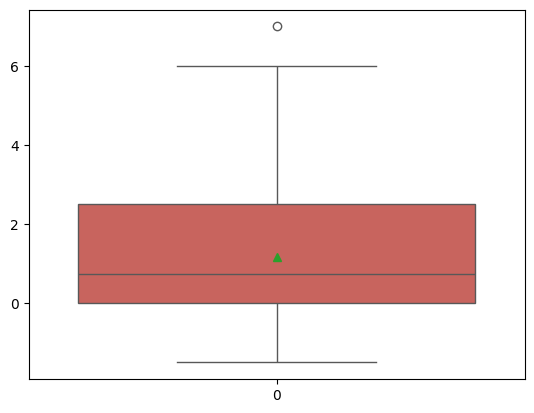

In [63]:
plot_n_boxplots([ar_results[:, 1, 1, 1].flatten()], [sns.xkcd_rgb["pale red"]])

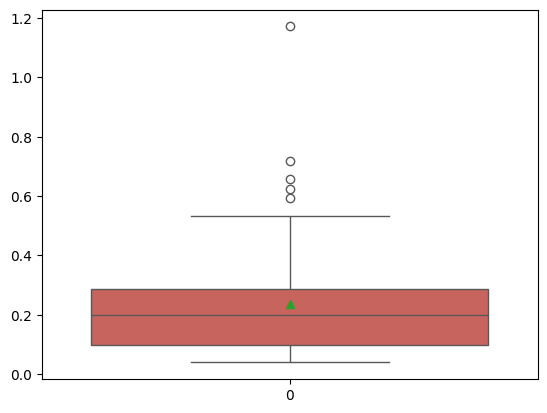

In [64]:
plot_n_boxplots([ar_results[:, 1, 1, 0].flatten()], [sns.xkcd_rgb["pale red"]])

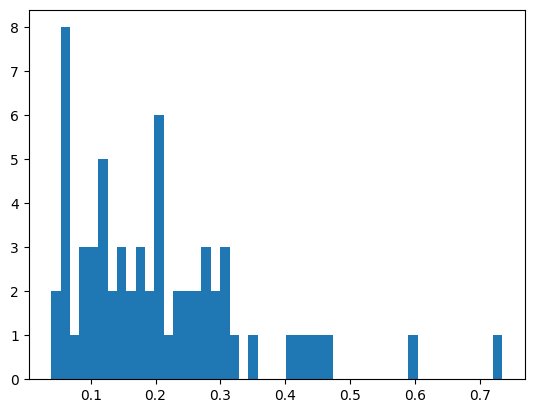

In [67]:
plt.hist([ar_results[:, 1, 1, 0].flatten()], bins=48)
plt.show()

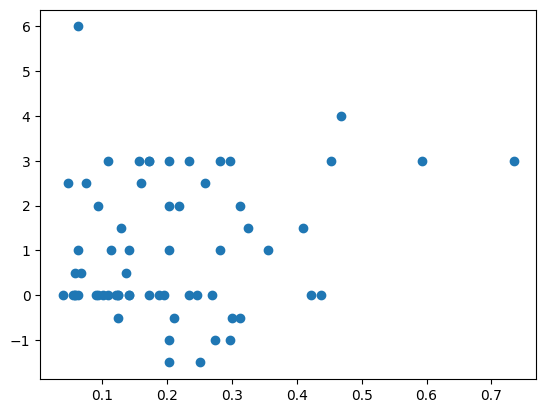

In [68]:
plt.scatter(ar_results[:, 1, 1, 0].flatten(), ar_results[:, 1, 1, 1].flatten())

Compared to the other thresholds

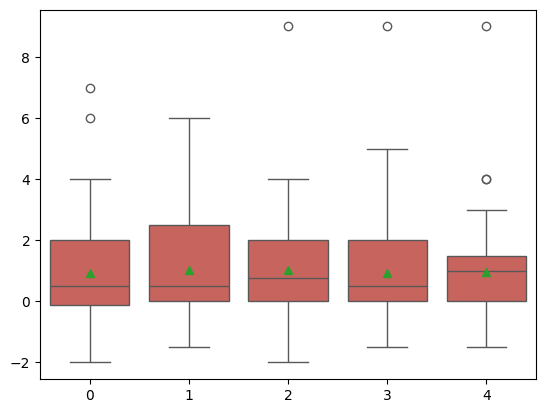

In [69]:
plot_n_boxplots([ar_results[:, 0, 1, 1].flatten(), ar_results[:, 1, 1, 1].flatten(), ar_results[:, 2, 1, 1].flatten(), ar_results[:, 3, 1, 1].flatten(), ar_results[:, 4, 1, 1].flatten()], [sns.xkcd_rgb["pale red"], sns.xkcd_rgb["pale red"], sns.xkcd_rgb["pale red"], sns.xkcd_rgb["pale red"], sns.xkcd_rgb["pale red"]])

Compared to not av_ref

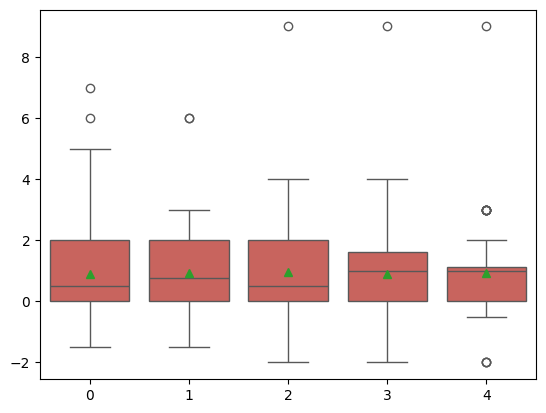

In [70]:
plot_n_boxplots([ar_results[:, 0, 0, 1].flatten(), ar_results[:, 1, 0, 1].flatten(), ar_results[:, 2, 0, 1].flatten(), ar_results[:, 3, 0, 1].flatten(), ar_results[:, 4, 0, 1].flatten()], [sns.xkcd_rgb["pale red"], sns.xkcd_rgb["pale red"], sns.xkcd_rgb["pale red"], sns.xkcd_rgb["pale red"], sns.xkcd_rgb["pale red"]])

More stats for the best one.

In [71]:
print(ar_results[:, 1, 1, 1].flatten())

[ 0.   0.  -0.5 -0.5  2.5  1.5  2.5  0.  -1.5  1.5  0.   1.5 -1.5 -1.
 -0.5  1.   1.   2.   3.   3.   1.   1.   2.   0.   3.  -1.   3.   0.
  0.   2.   2.   6.   0.   0.   3.   3.   0.   3.   4.   3.   0.  -1.
  0.   3.   0.   3.   3.   0.   0.   0.5  1.   0.  -0.5  0.   0.   0.
  0.   1.   2.5  0.   0.   0.5  0.5  2.5]


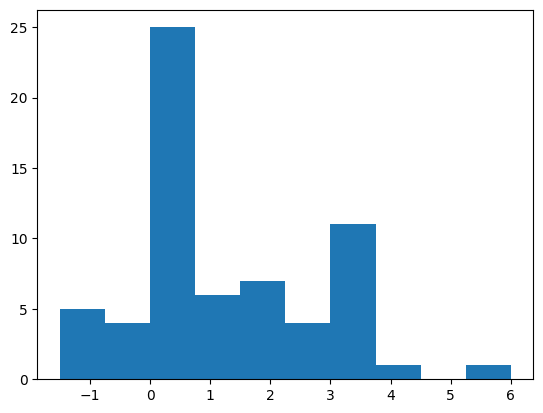

In [72]:
plt.hist(ar_results[:, 1, 1, 1])
plt.show()

In [73]:
t_statistic, p_value = stats.ttest_1samp(a=ar_results[:, 1, 1, 1], popmean=0) 
print(t_statistic , p_value)

5.30134066631361 1.569640151796438e-06


Investigating the statisitcs of itteration maximazing the average number of biological components.

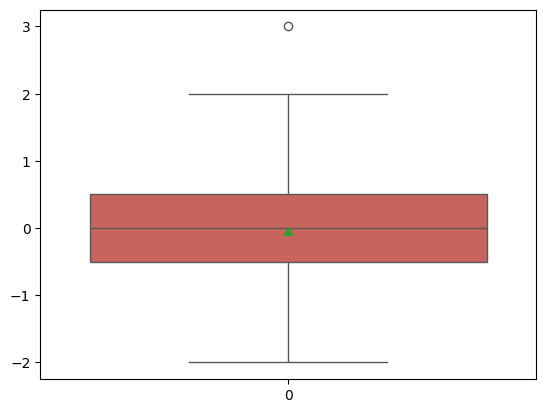

In [74]:
plot_n_boxplots([ar_results[:, 3, 0, 2].flatten()], [sns.xkcd_rgb["pale red"]])

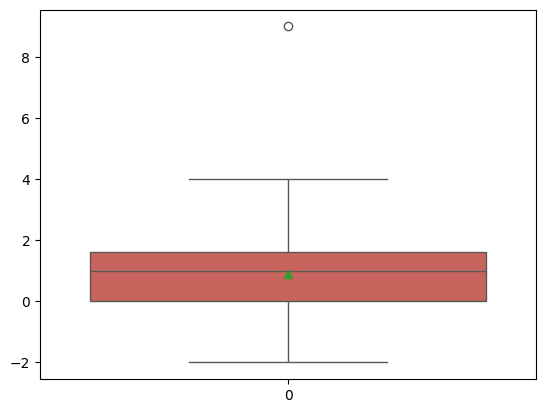

In [75]:
plot_n_boxplots([ar_results[:, 3, 0, 1].flatten()], [sns.xkcd_rgb["pale red"]])

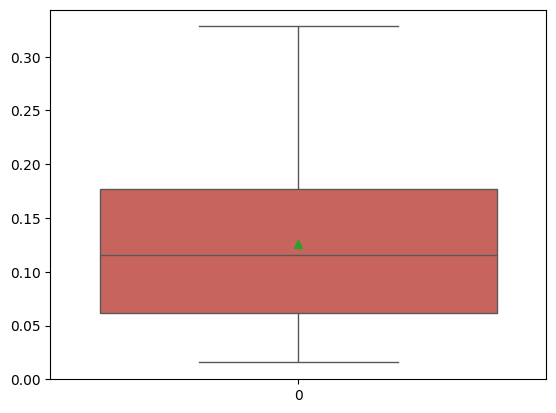

In [76]:
plot_n_boxplots([ar_results[:, 3, 0, 0].flatten()], [sns.xkcd_rgb["pale red"]])

Compared to the other thresholds

c:\Users\workbench\eirik_master\code\Masteroppgave2\env\lib\site-packages\plotting\templates.py:111: UserWarning: 
The palette list has fewer values (3) than needed (5) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(


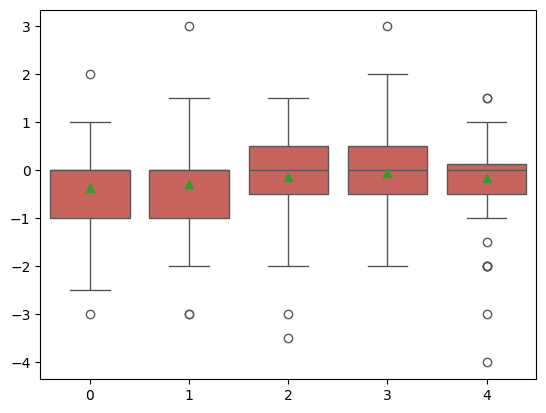

In [77]:
plot_n_boxplots([ar_results[:, 0, 0, 2].flatten(), ar_results[:, 1, 0, 2].flatten(), ar_results[:, 2, 0, 2].flatten(), ar_results[:, 3, 0, 2].flatten(), ar_results[:, 4, 0, 2].flatten()], [sns.xkcd_rgb["pale red"], sns.xkcd_rgb["pale red"], sns.xkcd_rgb["pale red"]])

Compared to av_ref

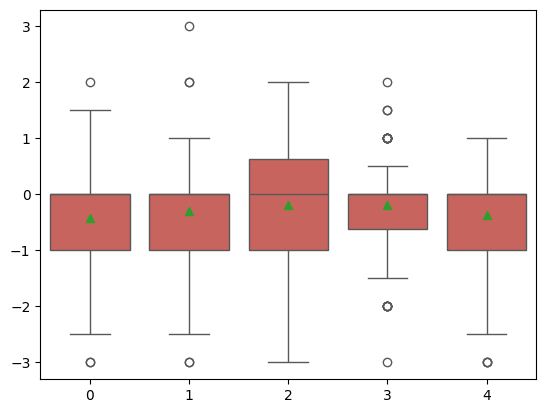

In [78]:
plot_n_boxplots([ar_results[:, 0, 1, 2].flatten(), ar_results[:, 1, 1, 2].flatten(), ar_results[:, 2, 1, 2].flatten(), ar_results[:, 3, 1, 2].flatten(), ar_results[:, 4, 1, 2].flatten()], [sns.xkcd_rgb["pale red"], sns.xkcd_rgb["pale red"], sns.xkcd_rgb["pale red"], sns.xkcd_rgb["pale red"], sns.xkcd_rgb["pale red"]])

More stats for the best one.

In [79]:
print(ar_results[:, 3, 0, 2].flatten())

[ 1.  -0.5  0.5  1.   1.5  0.   0.  -0.5  0.  -2.  -1.   0.5  0.   1.5
  1.5 -0.5 -2.   0.   0.   0.   0.   0.  -2.  -1.  -2.   0.   0.  -1.
 -1.   1.   1.   0.   0.   0.   0.   2.   0.   0.   0.   0.   0.   0.
  0.   0.   0.  -2.   0.   0.   0.5  3.   0.5  1.   0.5 -2.   0.5  0.
 -1.  -1.   1.  -1.   0.5 -1.5 -1.   1. ]


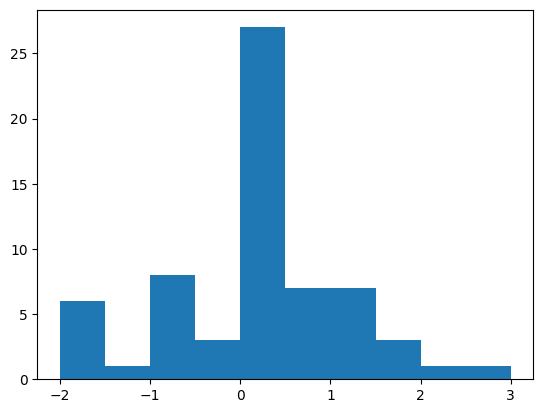

In [80]:
plt.hist(ar_results[:, 3, 0, 2])
plt.show()

In [81]:
t_statistic, p_value = stats.ttest_1samp(a=ar_results[:, 3, 0, 2], popmean=0) 
print(t_statistic , p_value)

-0.373934985810132 0.7097082269812273
